In [1]:
from morphi_lab.av import AV
from morphi_lab.segmenter import Segmenter
from morphi_lab.depther import DepthEstimator
import os
import cv2 
from PIL import Image
import numpy as np 
import torch
from diffusers import StableDiffusionInpaintPipeline

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    revision="fp16",
    # torch_dtype=torch.float16,
)

cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)

%load_ext autoreload
%autoreload 2

/Users/wattjer/Desktop/morphi_lab/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [ ]:
# plot img and mask 
import matplotlib.pyplot as plt
def plot_frame_and_mask(img, mask):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img)
    ax[1].imshow(mask)
    plt.show()

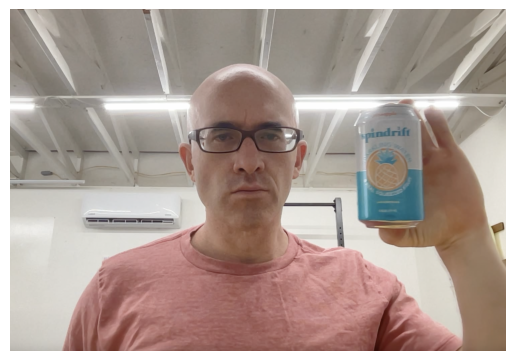

In [2]:
img_path = parent_dir + "/test_data/test_input/test_can.png"
av = AV(img_path)
av.show_result()

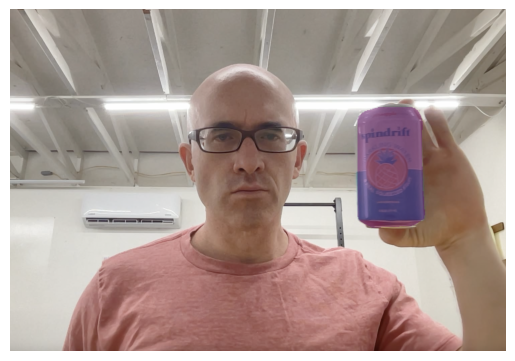

In [3]:
# detect and segment
segmenter = Segmenter()
segmenter.read_img_path(img_path)
segmenter.segment()
segmenter.project_segmentations()
segmenter.show_result()

In [4]:
# convert mask to PIL image
mask = segmenter.segmentation_result[0].masks.data[0].cpu().numpy()
mask = mask.astype(np.uint8)*255
mask = np.stack((mask,)*3, axis=-1)
mask = Image.fromarray(mask)
mask = mask.convert('RGB')
mask = mask.resize((512, 512)) 


# resize segmenter.img to 448x640
img = cv2.resize(segmenter.img, (640, 448))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = Image.fromarray(img)
img = img.convert('RGB')
img = img.resize((512, 512))

# save img and mask 
# img.save(parent_dir + "/test_data/test_input/test_can.png")
# img.save(parent_dir + "/test_data/test_input/test_can_512.png")
# mask.save(parent_dir + "/test_data/test_input/test_can_mask_512.png")

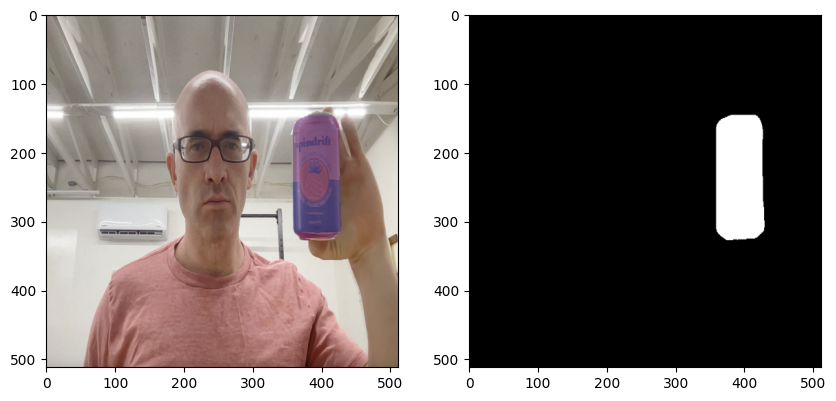

In [6]:
import torch
from diffusers import StableDiffusionInpaintPipeline

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    revision="fp16",
    # torch_dtype=torch.float16,
)

text_encoder/model.safetensors not found
/Users/wattjer/Desktop/morphi_lab/.venv/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [7]:
prompt = "Face of a yellow cat, high resolution, sitting on a park bench"

new_img = pipe(prompt=prompt,
             image=img,
             mask_image=mask).images[0]
# image.save("./yellow_cat_on_park_bench.png")

 26%|██▌       | 13/50 [00:50<02:23,  3.87s/it]

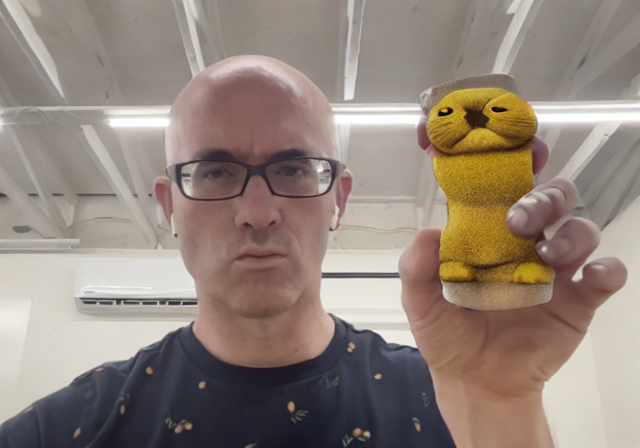

In [58]:
new_img.resize((640, 448))

In [63]:
prompt = "coca cola can, high resolution"

new_img = pipe(prompt=prompt,
             image=img,
             mask_image=mask).images[0]
# image.save("./yellow_cat_on_park_bench.png")

100%|██████████| 50/50 [03:12<00:00,  3.85s/it]


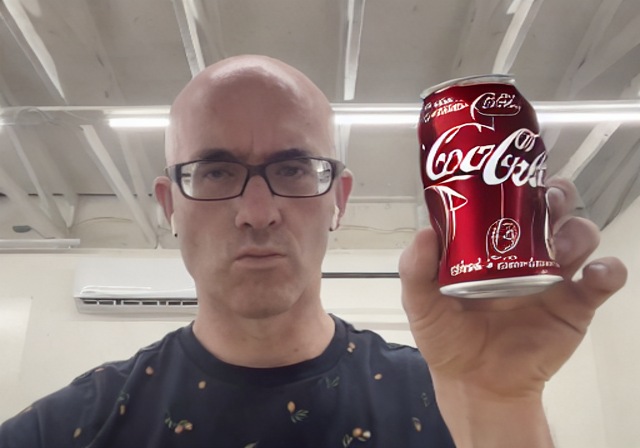

In [65]:
new_img.resize((640, 448))

# stable 2

In [68]:
from diffusers import StableDiffusionInpaintPipeline
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    # torch_dtype=torch.float16,
)



In [69]:
# pipe.to("cuda")
# prompt = "Face of a yellow cat, high resolution, sitting on a park bench"
#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
stable2_image = pipe(prompt=prompt, image=img, mask_image=mask).images[0]


100%|██████████| 50/50 [02:51<00:00,  3.43s/it]


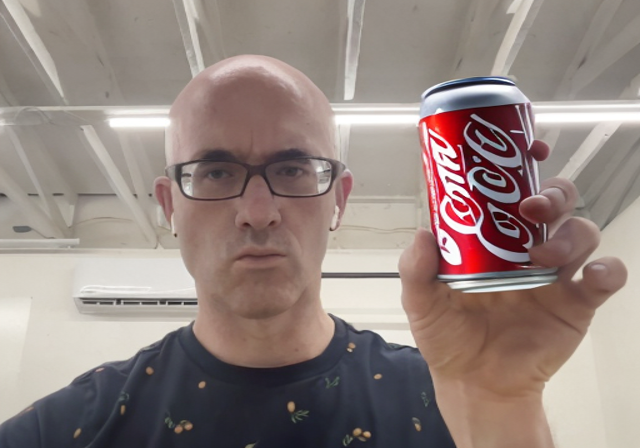

In [71]:
stable2_image.resize((640, 448))

In [72]:
stable2_image = pipe(prompt=prompt, image=img, mask_image=mask).images[0]


100%|██████████| 50/50 [02:45<00:00,  3.31s/it]


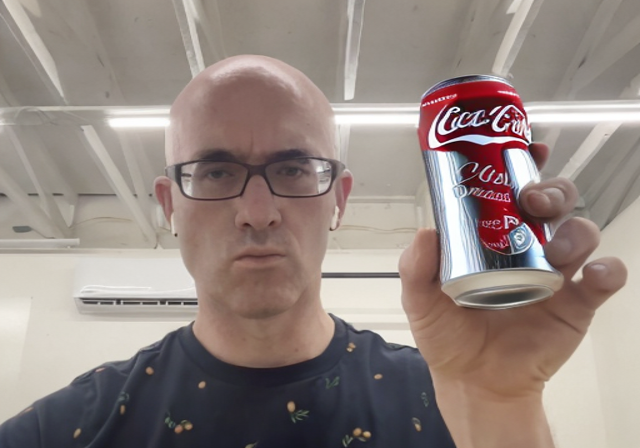

In [73]:
stable2_image.resize((640, 448))

In [74]:
stable2_image = pipe(prompt=prompt, image=img, mask_image=mask).images[0]


100%|██████████| 50/50 [02:46<00:00,  3.32s/it]


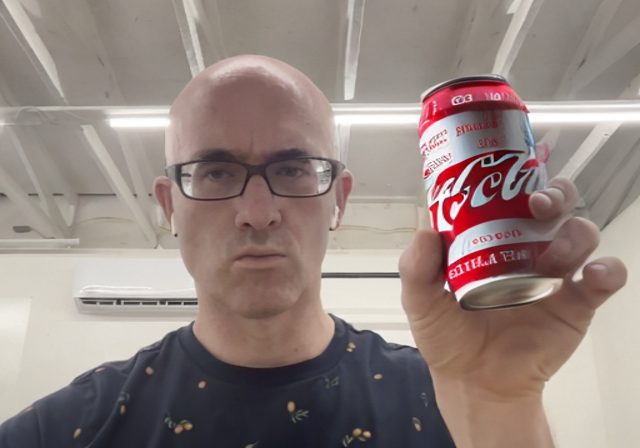

In [75]:
stable2_image.resize((640, 448))

In [76]:
stable2_image = pipe(prompt=prompt, image=img, mask_image=mask).images[0]


100%|██████████| 50/50 [02:46<00:00,  3.32s/it]


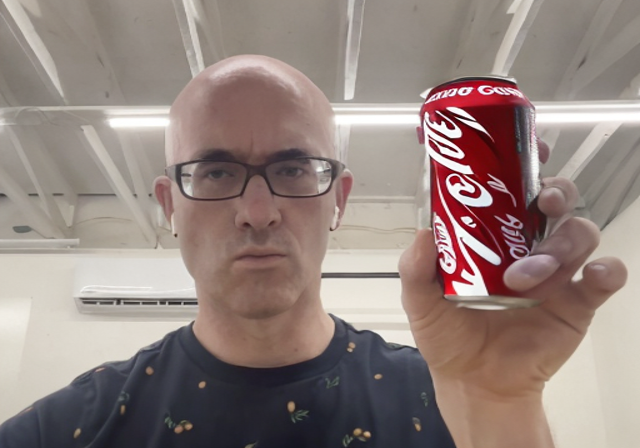

In [77]:
stable2_image.resize((640, 448))

In [78]:
stable2_image = pipe(prompt=prompt, image=img, mask_image=mask).images[0]


100%|██████████| 50/50 [02:42<00:00,  3.25s/it]


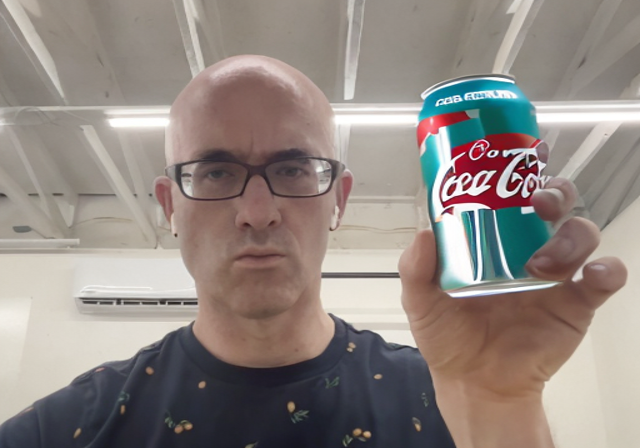

In [79]:
stable2_image.resize((640, 448))

100%|██████████| 50/50 [02:42<00:00,  3.25s/it]


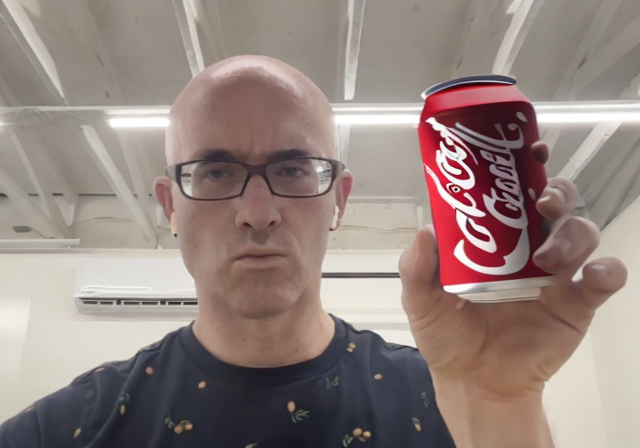

In [80]:
stable2_image = pipe(prompt=prompt, image=img, mask_image=mask).images[0]
stable2_image.resize((640, 448))

100%|██████████| 50/50 [02:40<00:00,  3.22s/it]


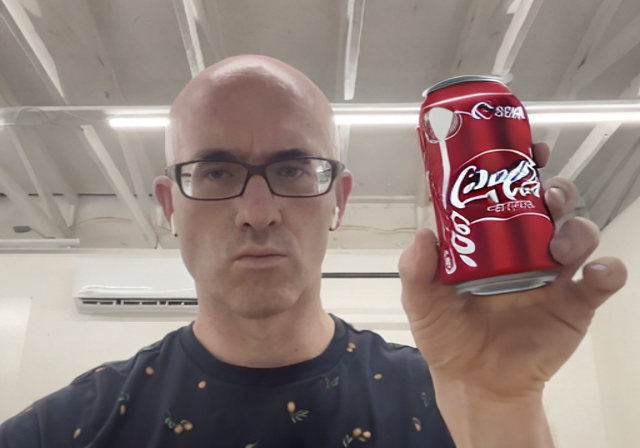

In [81]:
stable2_image = pipe(prompt=prompt, image=img, mask_image=mask).images[0]
stable2_image.resize((640, 448))